In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import BisectingKMeans

In [2]:
X = pd.read_csv("../preprocessing/X.csv")
y = pd.read_csv("../preprocessing/y.csv")
my_colors=['#FFB400', '#FF7C15', '#ED4672', '#A1CE3E', '#162802', '#017075']
color_mapping = {0: my_colors[0], 1: my_colors[1], 2: my_colors[2], 3: my_colors[3], 4: my_colors[4], 5: my_colors[5]}

In [3]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X)
pca = PCA(n_components=3)
X_pca_3 = pca.fit_transform(X)

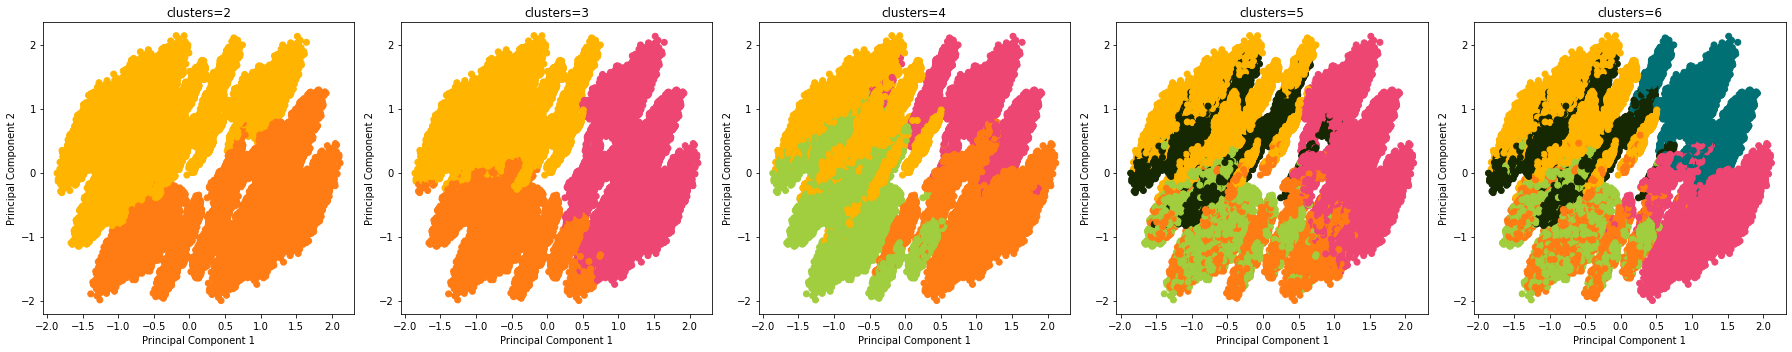

In [4]:
n_clusters = [i for i in range(2, 7)]
sse = []
silhouettes  = []
fig, plots = plt.subplots(1, 5, figsize = (25,5))
for nc, plot in zip(n_clusters, plots.flatten()):
    kmeans = KMeans(n_clusters=nc, n_init='auto', random_state = 42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
    colors = [color_mapping[i] for i in kmeans.labels_]
    plot.scatter(X_pca_2[:, 0], X_pca_2[:, 1], color=colors)
    plot.set_title(f'clusters={nc}')
    plot.set_xlabel("Principal Component 1")
    plot.set_ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Silhouette score')

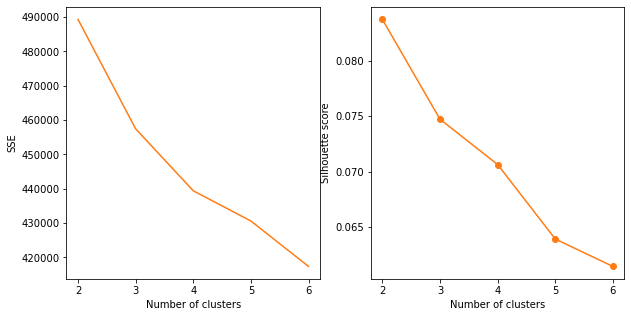

In [5]:
fig, plots = plt.subplots(1, 2, figsize=(10, 5))
plots[0].plot(n_clusters, sse, color=my_colors[1])
plots[0].set_xlabel('Number of clusters')
plots[0].set_ylabel('SSE')
plots[1].plot(n_clusters, silhouettes, marker='o', color=my_colors[1])
plots[1].set_xlabel('Number of clusters')
plots[1].set_ylabel('Silhouette score')

Algoritam je prepoznao da u skupu postoje 2 klastera, što se kosi sa činjenicom da ih ima zapravo 3. Možemo da probamo da ga navedemo na taj zaključak drugačijim postavljanjem centroida.

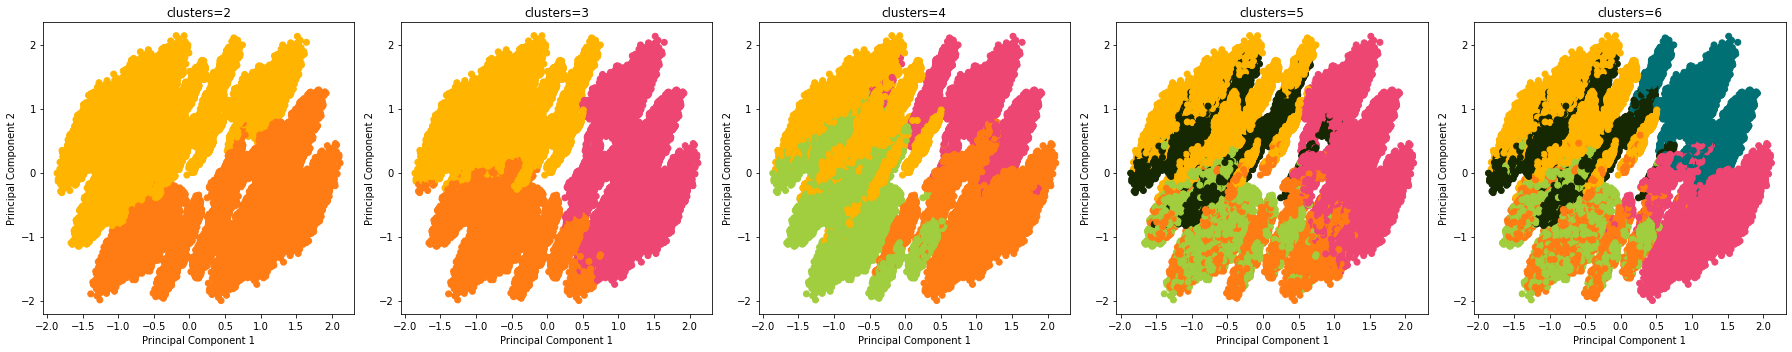

In [6]:
sse = []
silhouettes  = []
fig, plots = plt.subplots(1, 5, figsize = (25,5))
for nc, plot in zip(n_clusters, plots.flatten()):
    kmeans = KMeans(n_clusters=nc, n_init='auto', random_state = 42, init = 'k-means++')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
    colors = [color_mapping[i] for i in kmeans.labels_]
    plot.scatter(X_pca_2[:, 0], X_pca_2[:, 1], color=colors)
    plot.set_title(f'clusters={nc}')
    plot.set_xlabel("Principal Component 1")
    plot.set_ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Silhouette score')

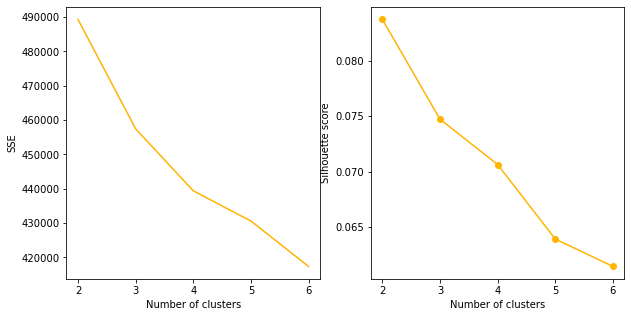

In [7]:
fig, plots = plt.subplots(1, 2, figsize=(10, 5))
plots[0].plot(n_clusters, sse, color=my_colors[0])
plots[0].set_xlabel('Number of clusters')
plots[0].set_ylabel('SSE')
plots[1].plot(n_clusters, silhouettes, marker='o', color=my_colors[0])
plots[1].set_xlabel('Number of clusters')
plots[1].set_ylabel('Silhouette score')

Zaključak modela je isti, pa nam ostaje da probamo BisectingKMeans.

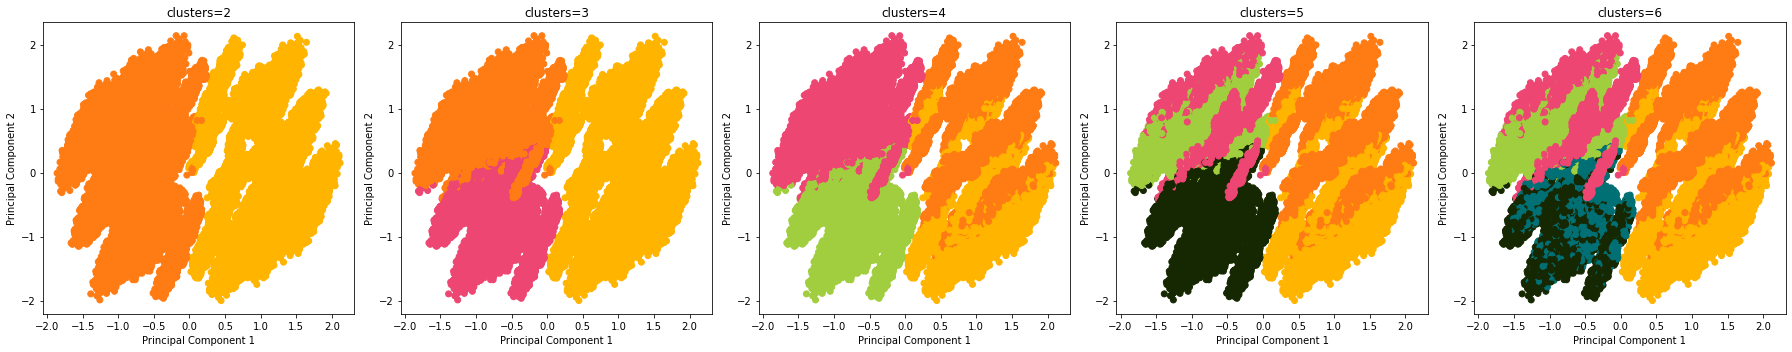

In [8]:
bisecting_sse = []
bisecting_silhouettes  = []
fig, plots = plt.subplots(1, 5, figsize = (25,5))
for nc, plot in zip(n_clusters, plots.flatten()):
    bkmeans = BisectingKMeans(n_clusters=nc, random_state=55)
    bkmeans.fit(X)
    bisecting_sse.append(kmeans.inertia_)
    bisecting_silhouettes.append(silhouette_score(X, kmeans.labels_))
    colors = [color_mapping[i] for i in bkmeans.labels_]
    plot.scatter(X_pca_2[:, 0], X_pca_2[:, 1], color=colors)
    plot.set_title(f'clusters={nc}')
    plot.set_xlabel("Principal Component 1")
    plot.set_ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Silhouette score')

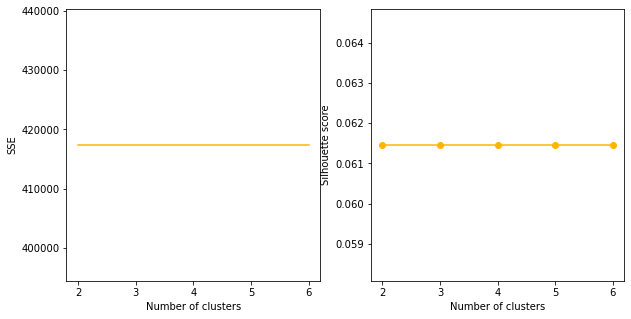

In [9]:
fig, plots = plt.subplots(1, 2, figsize=(10, 5))
plots[0].plot(n_clusters, bisecting_sse, color=my_colors[0])
plots[0].set_xlabel('Number of clusters')
plots[0].set_ylabel('SSE')
plots[1].plot(n_clusters, bisecting_silhouettes, marker='o', color=my_colors[0])
plots[1].set_xlabel('Number of clusters')
plots[1].set_ylabel('Silhouette score')

In [10]:
print(bisecting_silhouettes)

[0.061461291901341926, 0.061461291901341926, 0.061461291901341926, 0.061461291901341926, 0.061461291901341926]


In [11]:
print(bisecting_sse)

[417391.72977090086, 417391.72977090086, 417391.72977090086, 417391.72977090086, 417391.72977090086]
